In [2]:
from inference_video import predict_video
import os
from tqdm import tqdm
from model import MODEL
import torch
from ultralytics import YOLO
import numpy as np
from video_utils import *
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "mps" if torch.backends.mps.is_available() else device

print("Device: ", device)

Device:  cuda


In [3]:
old_model = MODEL("weights/best.pt", device = device)
new_model = MODEL("weights/best_newdata.pt", device = device)

test_dataset_path = "video_test_dataset/"
mades = os.listdir(test_dataset_path + '1')
misses = os.listdir(test_dataset_path + '0')
# remove ".DS_Store" file if it exists
if ".DS_Store" in mades:
    mades.remove(".DS_Store")
if ".DS_Store" in misses:
    misses.remove(".DS_Store")
    
actual = [1] * len(mades) + [0] * len(misses)
predictions = {model_: {0:[], 1:[]} for model_ in ["old_model", "new_model"]}


In [ ]:

for made in [0, 1]:
    videos = os.listdir(test_dataset_path + str(made))
    for video in tqdm(videos):
        video_path = test_dataset_path + str(made) + '/' + video
        predictions["old_model"][made].append(len(predict_video(video_path, model = old_model)))
        predictions["new_model"][made].append(len(predict_video(video_path, model = new_model)))

    


In [3]:
new_model_made = [1 if x > 0 else x for x in predictions['new_model'][1]]
new_model_missed = [1 if x > 0 else x for x in predictions['new_model'][0]]

old_model_made = [1 if x > 0 else x for x in predictions['old_model'][1]]
old_model_missed = [1 if x > 0 else x for x in predictions['old_model'][0]]

actual = [0] * len(old_model_missed) + [1] * len(old_model_made)



In [4]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

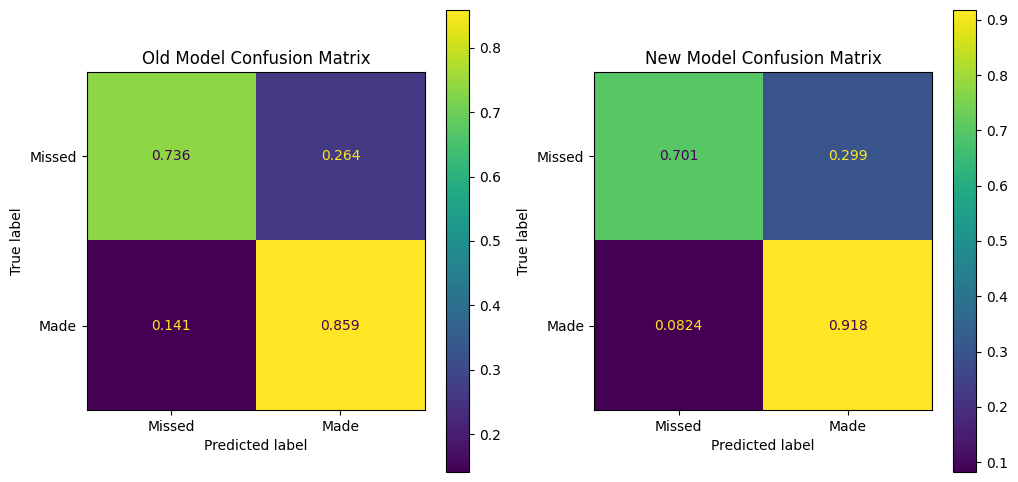

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ConfusionMatrixDisplay.from_predictions(actual, old_model_missed + old_model_made, display_labels = ["Missed", "Made"], values_format = ".3g", normalize='true', ax = ax[0]);
ax[0].set_title("Old Model Confusion Matrix");

ConfusionMatrixDisplay.from_predictions(actual, new_model_missed + new_model_made, display_labels = ["Missed", "Made"], values_format = ".3g", normalize='true', ax = ax[1]);
ax[1].set_title("New Model Confusion Matrix");

# Examples of new model correctly predicting clips where the old model 

In [8]:
# find Examples of new model correctly predicting clips where the old model failed
corrected = np.array(old_model_made) - np.array(new_model_made)
corrected_indices = np.where(corrected == -1)[0]

corrected_videos = [mades[i] for i in corrected_indices]


In [9]:
corrected_videos

['v_A8yaHdzYQ_3.mp4',
 'RPReplay_Final1702793512.mp4',
 '_1QKtqNFl8c_2.mp4',
 'v_A8yaHdzYQ_1.mp4',
 'RPReplay_Final1702697672.mp4']

In [4]:
corrected_videos = ['v_A8yaHdzYQ_3.mp4',
 'RPReplay_Final1702793512.mp4',
 '_1QKtqNFl8c_2.mp4',
 'v_A8yaHdzYQ_1.mp4',
 'RPReplay_Final1702697672.mp4']

# Example 1

In [5]:
predict_video(test_dataset_path + '1/' + corrected_videos[0], 
              model = old_model,
              show_progress = True,
              write_video= True)
display_video('output.mp4')

Processing Batches: 100%|██████████| 9/9 [00:42<00:00,  4.75s/it, fps=8.34 fps]


Output video saved at output.mp4


In [6]:
predict_video(test_dataset_path + '1/' + corrected_videos[0], 
              model = new_model,
              show_progress = True,
              write_video= True)
display_video('output.mp4')

Processing Batches: 100%|██████████| 9/9 [00:03<00:00,  2.25it/s, fps=39.55 fps]


Output video saved at output.mp4


# Example 2

In [7]:
predict_video(test_dataset_path + '1/' + corrected_videos[1], 
              model = old_model,
              show_progress = True,
              write_video= True)
display_video('output.mp4')

Processing Batches: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it, fps=3.66 fps] 


Output video saved at output.mp4


In [8]:
predict_video(test_dataset_path + '1/' + corrected_videos[1], 
              model = new_model,
              show_progress = True,
              write_video= True)
display_video('output.mp4')

Processing Batches: 100%|██████████| 5/5 [00:02<00:00,  2.23it/s, fps=212.84 fps]


Output video saved at output.mp4
